In [6]:
import re
import string
import collections

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('RubyBrabo_tweets.csv')
df2 = pd.read_csv('TedSchubel_tweets.csv')
df.head()

id           created_at  \
0  1192492792473440256  2019-11-07 17:23:31   
1  1192492683123740672  2019-11-07 17:23:05   
2  1191750738168483841  2019-11-05 16:14:52   
3  1191714950689021952  2019-11-05 13:52:39   
4  1191656911206256640  2019-11-05 10:02:02   

                                                text  
0  RT @TedSchubel: AUDIO:  Fredericksburg and Spo...  
1  RT @TedSchubel: VIDEO:  The Fredericksburg Sal...  
2  RT @TedSchubel: AUDIO:  April Burch talks abou...  
3  #EveryVoteMatters #KingGeorgeCounty @NewsNetNe...  
4  RT @TedSchubel: A community comes together. Ba...

In [8]:
def fix_text(s):
    """Extract the real text of the tweet from CSV field."""
    match = re.search(pattern="""b['"](.+)'""", string=s)
    if match:
        return match.group(1)
    return ''

def clean_punct(s):
    """Remove unwanted punctuation from a string."""
    punct = set(string.punctuation) - set('@#') | set(b'\xe2\x80\xa6'.decode())
    punct = ''.join(punct)
    trans_table = s.maketrans('', '', punct)
    return s.translate(trans_table)

df['text'] = df['text'].map(clean_punct)
df2['text'] = df2['text'].map(clean_punct)

#df['text'] = df['text'].map(fix_text)
df['created_at'] = pd.to_datetime(df['created_at'])
df2['created_at'] = pd.to_datetime(df2['created_at'])
df.head()

id          created_at  \
0  1192492792473440256 2019-11-07 17:23:31   
1  1192492683123740672 2019-11-07 17:23:05   
2  1191750738168483841 2019-11-05 16:14:52   
3  1191714950689021952 2019-11-05 13:52:39   
4  1191656911206256640 2019-11-05 10:02:02   

                                                text  
0  RT @TedSchubel AUDIO  Fredericksburg and Spots...  
1  RT @TedSchubel VIDEO  The Fredericksburg Salva...  
2  RT @TedSchubel AUDIO  April Burch talks about ...  
3  #EveryVoteMatters #KingGeorgeCounty @NewsNetNe...  
4  RT @TedSchubel A community comes together Band...

In [9]:
# Create dataframe of weekly tweets
df1 = df.set_index('created_at')
df2a = df2.set_index('created_at')
weekly = df1.resample('W', label='left').size().to_frame('tweets_per_week')
monthly = df1.resample('M', label='left').size().to_frame('tweets_per_month')
monthly2 = df2a.resample('M', label='left').size().to_frame('tweets_per_month')
monthly2.head()

tweets_per_month
created_at                  
2018-04-30               269
2018-05-31               199
2018-06-30               174
2018-07-31               196
2018-08-31               227

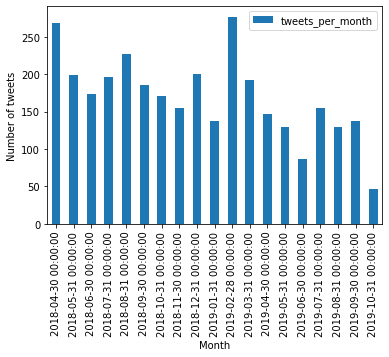

In [10]:
# Plot monthly tweets
#monthly.plot.bar()
monthly2.plot.bar()
plt.xlabel('Month')
plt.ylabel('Number of tweets')
plt.show()

# Wordcloud

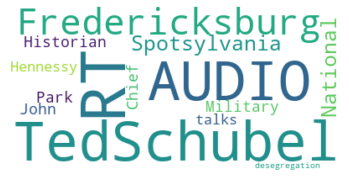

In [180]:
# Start with one tweet:
text = df.text[0]

# Generate word cloud image
wc = WordCloud(background_color='white').generate(text)
wc.to_file('single_tweet.png')

# Display generated image
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

389440 words in all tweets


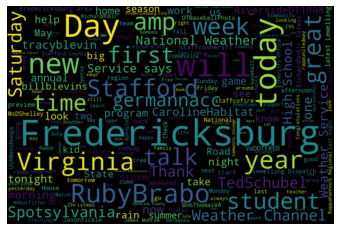

In [13]:
# Do all the tweets

#fulltext = r' '.join(twt for twt in df.text)
fulltext = r' '.join(twt for twt in df2.text)
print(f'{len(fulltext)} words in all tweets')

# Exclude certain words
stopwords = set(STOPWORDS)
stopwords.update(['RT', 'https', 'co', 'AUDIO', 'VIDEO'])

wc1 = WordCloud(stopwords=stopwords, width=1200, height=800, margin=1).generate(fulltext)
wc1.to_file('TedSchubel_all.png')

plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# Analyze and clean words used

# Create a set of unique words
textset = set(fulltext.split())
textset = {w for w in textset if 'https:' not in w}

# List of all words
wordlist = fulltext.split()
wordfreq = {}
for w in set(wordlist):
    wordfreq[w] = wordlist.count(w)
wordfreq = sorted(wordfreq.items(), key=lambda kv: kv[1], reverse=True)

In [18]:
# Who gets retweeted the most?
[x for x in wordfreq if '@' in x[0][0]]

[('@RubyBrabo', 120),
 ('@germannacc', 114),
 ('@TedSchubel', 98),
 ('@CarolineHabitat', 75),
 ('@RichardOnAir', 73),
 ('@tracyblevins', 69),
 ('@OTBaseballPhoto', 62),
 ('@BobThomasVA', 57),
 ('@billblevins', 54),
 ('@MsDShelley', 54),
 ('@VaDOTFRED', 53),
 ('@RiversideDT1998', 52),
 ('@Jasontickle', 51),
 ('@staffcosheriff', 43),
 ('@UVAMensHoops', 39),
 ('@staffcofire', 37),
 ('@RROutfitter', 32),
 ('@NewsNetNews', 32),
 ('@rappunitedway', 29),
 ('@FXBGPolice', 28),
 ('@SpotsySchools', 27),
 ('@SBakerSCPSSupt', 27),
 ('@reichardrock', 25),
 ('@', 24),
 ('@HapConnors', 23),
 ('@sigg20', 23),
 ('@jtuckermartin', 20),
 ('@VirginiaSports', 20),
 ('@DeeontheB', 18),
 ('@RWcopter', 17),
 ('@Wesante', 17),
 ('@JMonroeMuseum', 16),
 ('@BelleGroveVA', 15),
 ('@UVAFootball', 15),
 ('@brianjayjones', 15),
 ('@RobWittman', 14),
 ('@KiznerScott', 13),
 ('@UMichFootball', 13),
 ('@SpotsyKnights', 13),
 ('@NACoTweets', 13),
 ('@SCPSchools', 13),
 ('@Super70sSports', 13),
 ('@ReevesVA', 13),
 ('@md